In [1]:
# Import dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats
import pandas as pd

import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
## Part 1: Analyze and Explore the Climate Data

In [4]:
# Path to sqlite
engine = create_engine("sqlite:///D:\SurfsUp\Resources\hawaii.sqlite")
conn = engine.connect()

In [5]:
# Declare a SQLAlchemy base using automap_base
Base = automap_base()
# reflect the db tables
Base.prepare(autoload_with = engine)

In [6]:
# View all classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Link Python to the database by creating a SQLAlchemy session
session = Session(engine)

In [9]:
## Precipitation Analysis

In [10]:
# Find the last date in the dataset
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [11]:
# Calculate the date 1 year previous from the last data point in db
prev_yr = dt.date(2017,8,23) - dt.timedelta(days=365)
print(prev_yr)

2016-08-23


In [12]:
# Select only the "date" and "prcp" values.
date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_yr).all()
for record in date_prcp:
    print(record)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [13]:
# Load the query results into a Pandas DataFrame, and set the index to the "date" column
# Sort df values by date
date_prcp2_df = pd.DataFrame(date_prcp, columns = ["date", "prcp"])
date_prcp2_df.dropna(axis=0, how='any', inplace= True)
date_prcp2_df = date_prcp2_df.sort_values(["date"])
date_prcp2_df.set_index("date", inplace=True)
date_prcp2_df.head(100)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2016-09-09,0.01
2016-09-09,0.35
2016-09-09,0.23


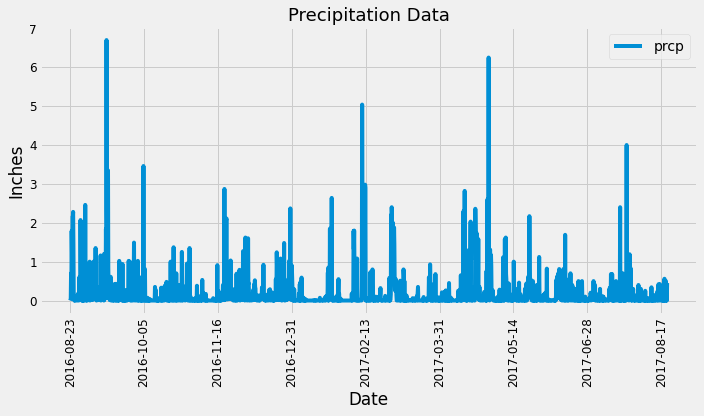

In [14]:
date_prcp2_df.plot(figsize=(10,6), fontsize=12, rot=90)
plt.title(f"Precipitation Data", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.tight_layout()
plt.savefig("D:/SurfsUp/Fig1.png")
plt.show()

In [15]:
# Use Pandas to print the summary statistics for the precipitation data
date_prcp2_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).group_by(Station.station).count()

9

In [18]:
# Design a query to find the most-active stations (that is, the stations that have the most rows)
# List the stations and observation counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# --- identify most active station ---
most_active = active_stations[0][0]
print (f"The most active station is {most_active}.")

The most active station is USC00519281.


In [20]:
# Design a query that calculates the lowest, highest, and average temperatures that filters on the most active station id 
#found in the previous query
temps = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

print(f"The lowest, highest, and average temperatures of the most active station id are: {temps}.")

The lowest, highest, and average temperatures of the most active station id are: [('USC00519281', 54.0, 85.0, 71.66378066378067)].


In [21]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data
# - Filter by the station that has the greatest number of observations.
# - Query the previous 12 months of TOBS data for that station.
# - Plot the results as a histogram

In [22]:
temps = session.query(Measurement.tobs).filter(Measurement.station == most_active).\
    filter(Measurement.date >= prev_yr).all()
temps

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [23]:
temps_df = pd.DataFrame(temps, columns=["tobs"])
temps_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


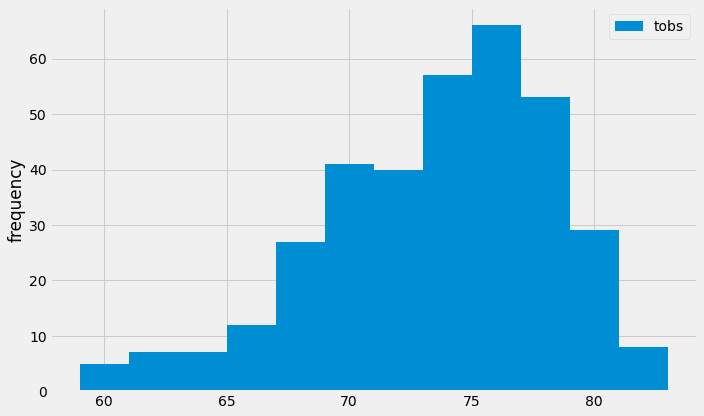

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
plt.hist(temps_df["tobs"], bins=12)
plt.ylabel("frequency")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("D:/SurfsUp/Fig2.png")
plt.show()

In [25]:
# Close session
session.close()